In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

In [2]:
xOri = pd.read_csv('linearX.csv', header=None).values.flatten()
yOri = pd.read_csv('linearY.csv', header=None).values.flatten()

In [3]:
print("First 5 values of X:", xOri[:5])
print("First 5 values of Y:", yOri[:5])

First 5 values of X: [9.1 8.  9.1 8.4 6.9]
First 5 values of Y: [0.99523 0.99007 0.99769 0.99386 0.99508]


In [4]:
x_mean, x_std = np.mean(xOri), np.std(xOri)
xOri = (xOri - x_mean) / x_std

In [5]:
n = len(xOri)

In [6]:
def batch_gradient_descent(alpha, iter=50):
    m, b = 0, 0  
    cost_history = []
    
    for _ in range(iter):
        yPred = m * xOri + b
        error = yPred - yOri

        dm = (2/n) * np.sum(error * xOri)
        db = (2/n) * np.sum(error)

        m -= alpha * dm
        b -= alpha * db

        cost = np.mean(error ** 2)
        cost_history.append(cost)

    return m, b, cost_history

In [7]:
m, b, cost_history = batch_gradient_descent(alpha=0.5)

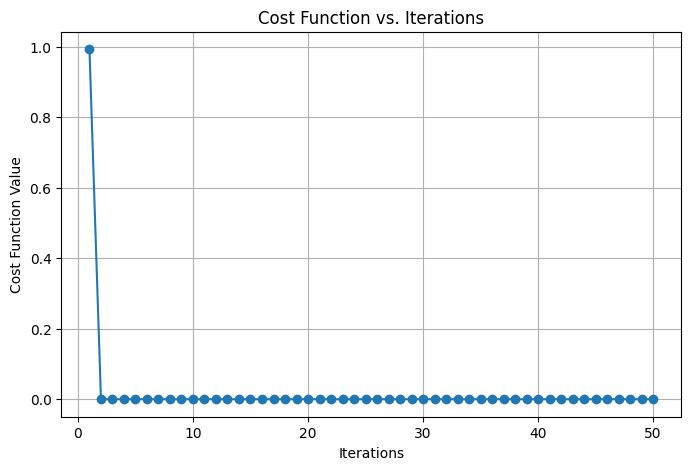

In [8]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, 51), cost_history, marker='o', linestyle='-')
plt.xlabel('Iterations')
plt.ylabel('Cost Function Value')
plt.title('Cost Function vs. Iterations')
plt.grid(True)
plt.show()

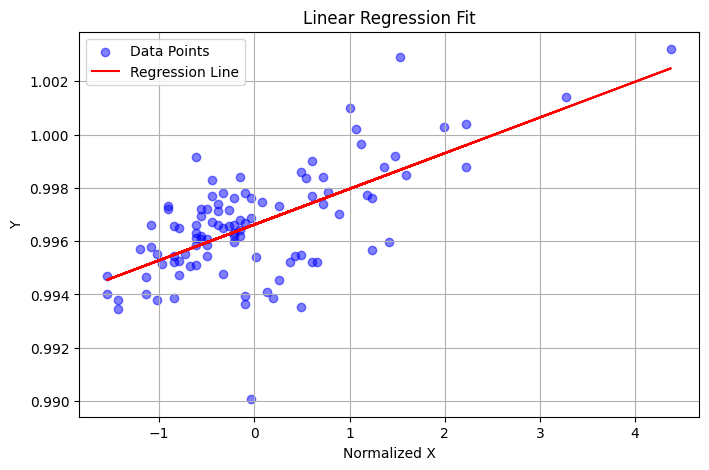

In [9]:
plt.figure(figsize=(8, 5))
plt.scatter(xOri, yOri, label='Data Points', color='blue', alpha=0.5)
plt.plot(xOri, m * xOri + b, color='red', label='Regression Line')
plt.xlabel('Normalized X')
plt.ylabel('Y')
plt.title('Linear Regression Fit')
plt.legend()
plt.grid(True)
plt.show()

In [10]:
def gradient_descent(alpha, iter=50):
    m, b = 0, 0
    cost_history = []
    
    for _ in range(iter):
        yPred = m * xOri + b
        error = yPred - yOri

        dm = (2/n) * np.sum(error * xOri)
        db = (2/n) * np.sum(error)

        m -= alpha * dm
        b -= alpha * db

        cost = np.mean(error ** 2)
        cost_history.append(cost)
    
    return cost_history
learningRates = [0.005, 0.5, 5]
cost_histories = {alpha: gradient_descent(alpha) for alpha in learningRates}

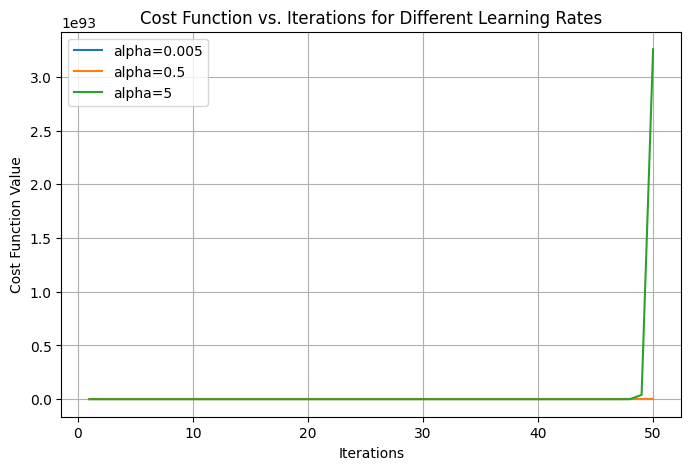

In [11]:
plt.figure(figsize=(8, 5))
for alpha, cost in cost_histories.items():
    plt.plot(range(1, 51), cost, label=f'alpha={alpha}')

plt.xlabel('Iterations')
plt.ylabel('Cost Function Value')
plt.title('Cost Function vs. Iterations for Different Learning Rates')
plt.legend()
plt.grid(True)
plt.show()

In [12]:
def stochastic_gradient_descent(alpha, iter=50):
    m, b = 0, 0
    cost_history = []
    
    for _ in range(iter):
        for i in range(n):
            idx = random.randint(0, n - 1)
            xi, yi = xOri[idx], yOri[idx]
            
            yPred = m * xi + b
            error = yPred - yi
            
            dm = 2 * error * xi
            db = 2 * error
            
            m -= alpha * dm
            b -= alpha * db
        
        cost = np.mean((m * xOri + b - yOri) ** 2)
        cost_history.append(cost)
    
    return cost_history
sgd_cost_history = stochastic_gradient_descent(alpha=0.1)

In [13]:
def mini_batch_gradient_descent(alpha, batchSize=10, iter=50):
    m, b = 0, 0
    cost_history = []
    
    for _ in range(iter):
        indices = np.random.permutation(n)
        for i in range(0, n, batchSize):
            batch_indices = indices[i:i + batchSize]
            x_batch, y_batch = xOri[batch_indices], yOri[batch_indices]
            
            yPred = m * x_batch + b
            error = yPred - y_batch
            
            dm = (2 / batchSize) * np.sum(error * x_batch)
            db = (2 / batchSize) * np.sum(error)
            
            m -= alpha * dm
            b -= alpha * db
        
        cost = np.mean((m * xOri + b - yOri) ** 2)
        cost_history.append(cost)
    
    return cost_history
mbgd_cost_history = mini_batch_gradient_descent(alpha=0.1, batchSize=10)

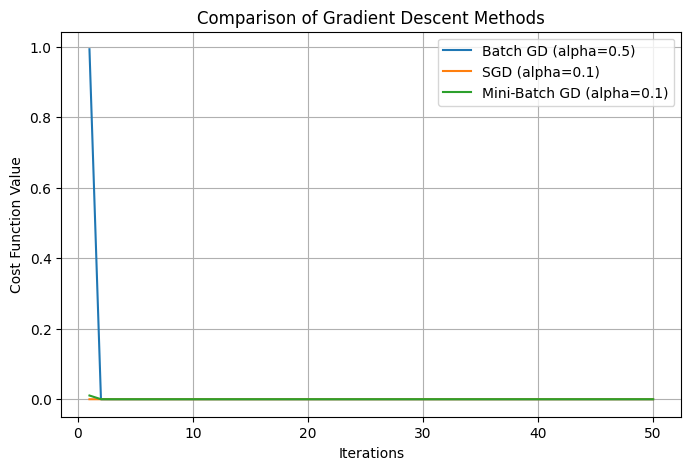

In [14]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, 51), cost_histories[0.5], label='Batch GD (alpha=0.5)')
plt.plot(range(1, 51), sgd_cost_history, label='SGD (alpha=0.1)')
plt.plot(range(1, 51), mbgd_cost_history, label='Mini-Batch GD (alpha=0.1)')

plt.xlabel('Iterations')
plt.ylabel('Cost Function Value')
plt.title('Comparison of Gradient Descent Methods')
plt.legend()
plt.grid(True)
plt.show()